# myanimelist age classifier

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate
bs = 64

In [8]:
path = Path('.','Anime_Pictures.tar.gz') 
tarfile.open(path, 'r:gz').extractall()


In [4]:
import os 
shutil.rmtree('./Anime_Pictures')

In [9]:
path_img = Path('./Anime_Pictures/')
fnames = get_image_files(path_img)

In [7]:
age_pat = r'/([a-z]*)_[a-z]*_[fm]_.*jpg$'

In [8]:
hair_pat = r'[a-z]*_([a-z]*)_[fm]_.*jpg$'

In [5]:
mf_pat = r'/[a-z]*_[a-z]*_([fm])_.*jpg$'

Make sure regular expression works for all image file names

In [ ]:
#import re

#s = str(fnames[1:len(fnames):3])
#pat = re.compile(age_pat)
#count = 0
#for x in fnames:
    #if "Anime_Pictures/teen_purple_m_Jousuke_Higashikata.jpg" in str(x):
      #  print(count)
   # count += 1
   # if count > 140 and count < 150:
    #    print(x)
   #     print(pat.search(str(x)).group(1), x) 

## Age classifier with pretrained imageNet weights

In [10]:
np.random.seed(3)
no_transforms = get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0)
data = ImageDataBunch.from_name_re('./Anime_Pictures', fnames, age_pat, ds_tfms=no_transforms, size=224, bs=bs//2
                                  ).normalize(imagenet_stats)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


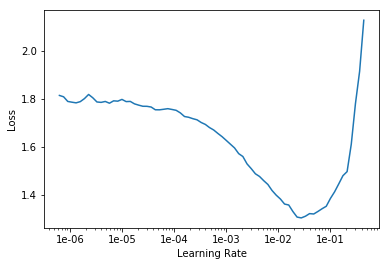

In [11]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)
learn.lr_find()
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.700294,1.154018,0.471264
2,1.258469,1.255700,0.482759
3,0.943823,1.211735,0.413793
4,0.717896,1.184109,0.367816


In [13]:
learn.save('stage-1-50')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


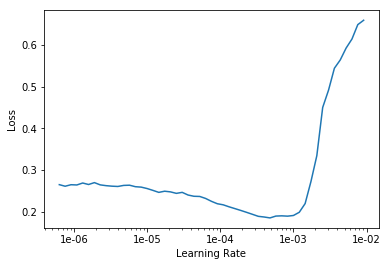

In [14]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.278551,1.170171,0.356322
2,0.242604,1.182929,0.390805
3,0.198237,1.188930,0.379310
4,0.177018,1.190491,0.367816


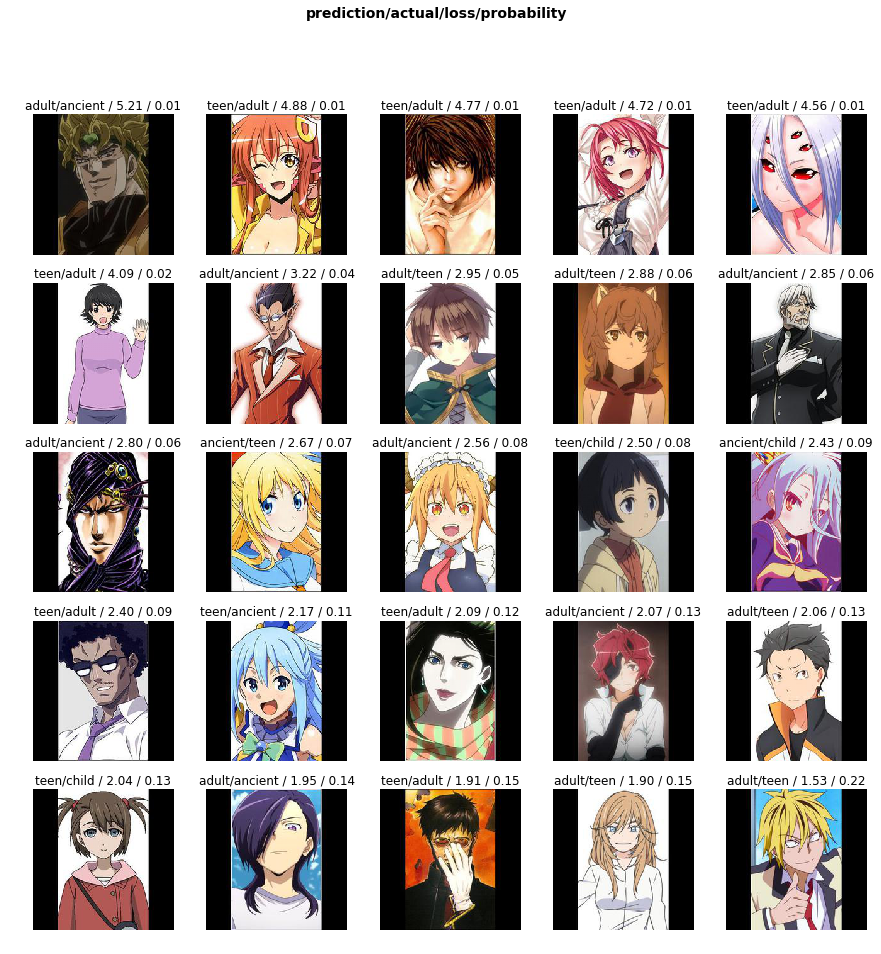

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(25, figsize=(15,15))

## Age classifier using transfer learning 

### Train hair colour classifier 
random is seeded with a different number to use a different training set

In [18]:
np.random.seed(47)
no_transforms = get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0)
data = ImageDataBunch.from_name_re(path_img, fnames, hair_pat, ds_tfms=get_transforms(), size=224, bs=bs//2
                                  ).normalize(imagenet_stats)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


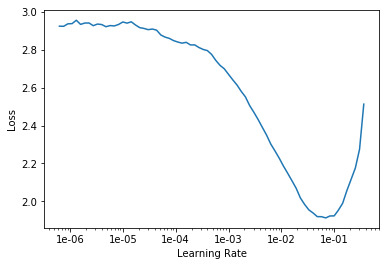

In [19]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,2.508028,1.931774,0.655172
2,1.839525,2.019433,0.632184
3,1.434571,1.956060,0.563218
4,1.137041,1.890085,0.551724


In [21]:
learn.save('hair-unfrozen')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


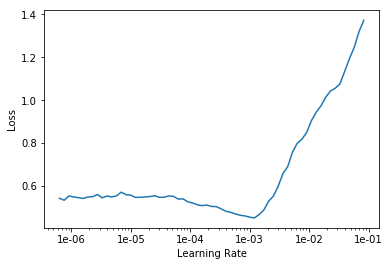

In [22]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.604275,1.852294,0.551724
2,0.583058,1.781555,0.563218
3,0.536591,1.757046,0.551724
4,0.520429,1.761823,0.551724


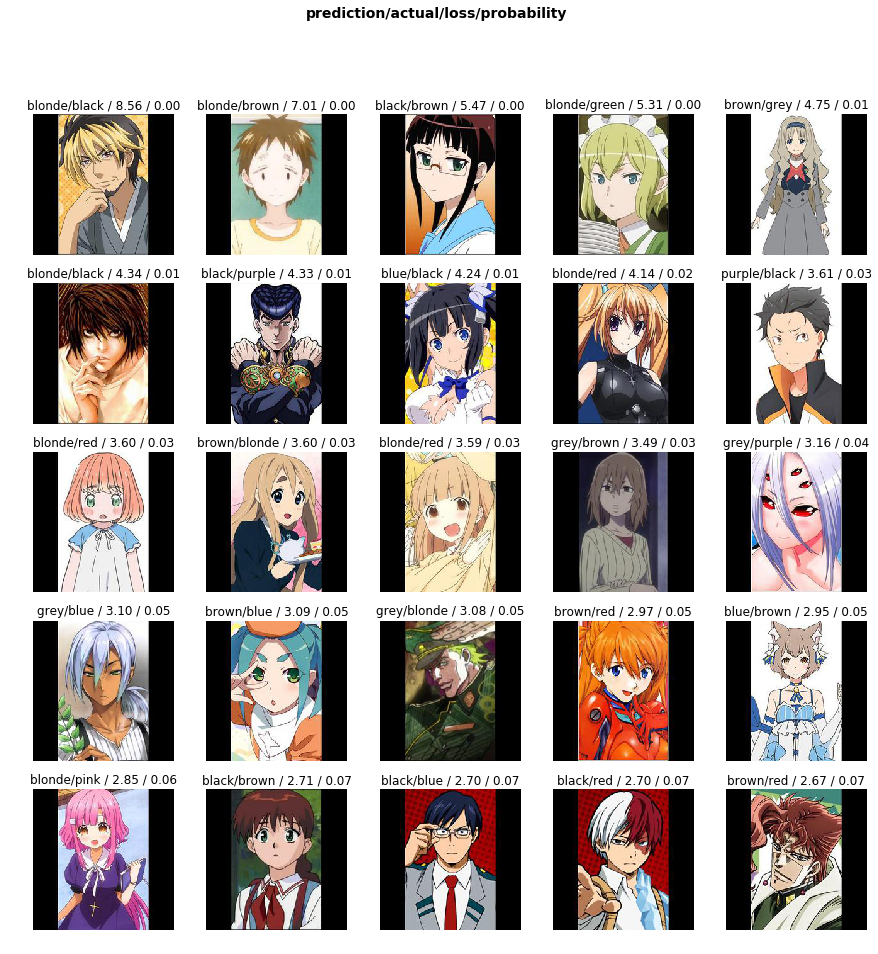

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(25, figsize=(15,15))

### Train gender classifier 
random is seeded with a different number to use a different training set

In [10]:
np.random.seed(6)
no_transforms = get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0)
data = ImageDataBunch.from_name_re(path_img, fnames, mf_pat, ds_tfms=no_transforms, size=224, bs=bs//2
                                  ).normalize(imagenet_stats)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


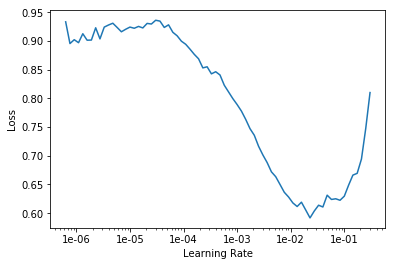

In [11]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)
learn.lr_find()
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.740585,0.555616,0.252874
2,0.507026,0.615801,0.195402
3,0.361053,0.660823,0.206897
4,0.301223,0.664204,0.206897


In [13]:
learn.save('stage-1-50')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


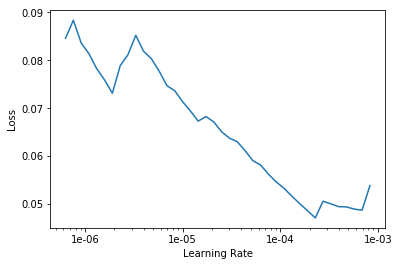

In [14]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.206067,0.707208,0.264368
2,0.384569,2.035467,0.356322
3,0.343782,0.705620,0.172414
4,0.244902,0.554056,0.160920


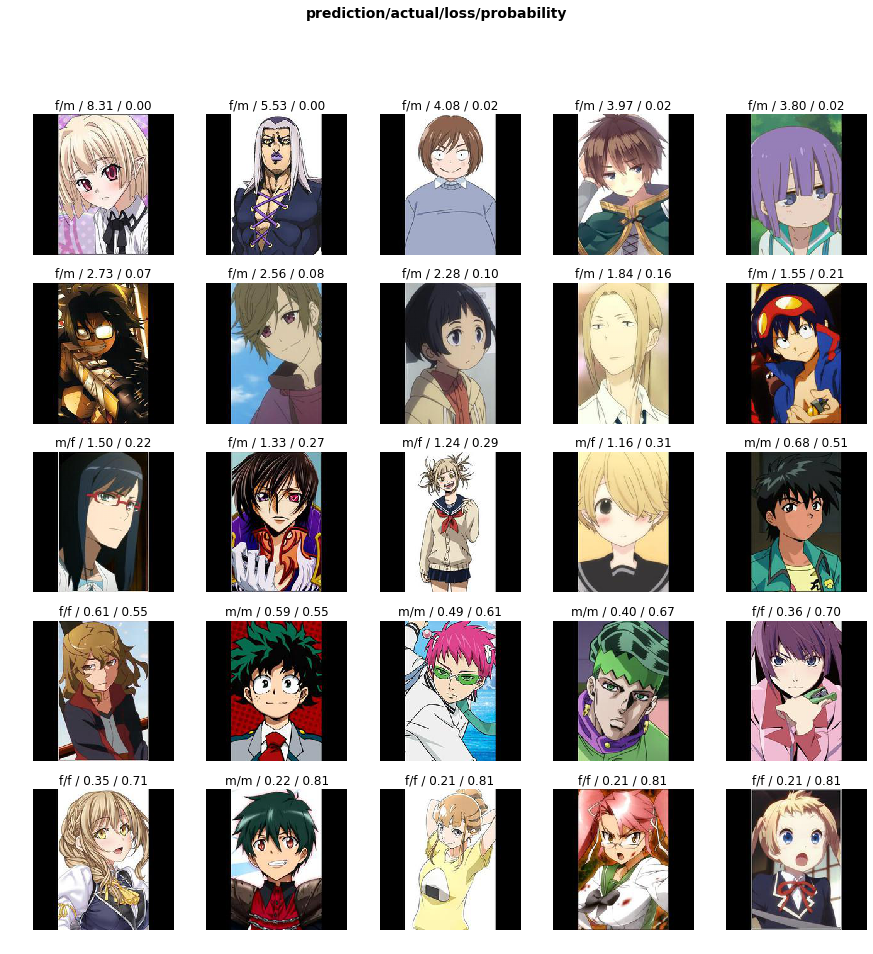

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(25, figsize=(15,15))

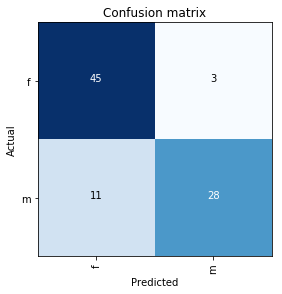

In [17]:
interp.plot_confusion_matrix()